In [6]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

import logistic as lgtc
import generate_alphas as ga
import utilities as ut
import clef_algo as clf
import extreme_data as extr

In [2]:
d = 100
K = 50
max_size = 8
p_geom = 0.25
list_charged_faces = ga.gen_random_alphas(d, K, max_size, p_geom, with_singlet=False)[0]

In [3]:
n = int(1e4)
as_dep = 0.1
X = lgtc.asym_logistic(d, list_charged_faces, n, as_dep)

In [4]:
import extreme_data as xtr
V = xtr.rank_transformation(X)

In [9]:
R = 700
n_extr = np.sum(np.sum(V > R, axis=1) > 0)
print 'nb extreme points:', n_extr
V_bin = 1.*(V > R)
V_bin = V_bin[np.sum(V_bin, axis=1) > 0]
D = ut.dist_levenshtein(V_bin)
gam = 5.
S = np.exp(-gam*D**2) #1 - D**2

nb extreme points: 538


In [ ]:
t = 100
x = np.linspace(0, 1, t)
plt.plot(x, 1 - x**4)
plt.plot(x, 1-x, 'r')
plt.show()

/usr/lib/python2.7/dist-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/lib/python2.7/dist-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/usr/lib/python2.7/dist-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/usr/lib/python2.7/dist-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/ma

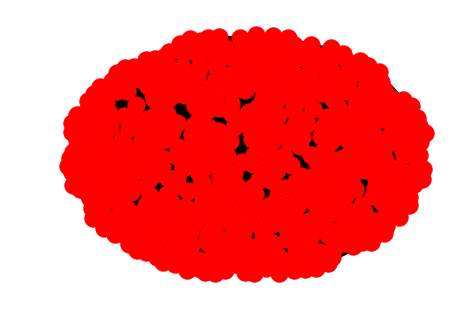

In [10]:
G = nx.from_numpy_matrix(S)
pos = nx.spring_layout(G, k=0.1)
nx.draw(G, pos=pos)

In [13]:
from sklearn.cluster import SpectralClustering
# Spectral clustering
K_spec = 50
spc = SpectralClustering(n_clusters=K_spec, affinity='precomputed')
spc.fit(S)
labels = spc.labels_

In [18]:
print [np.sum(labels == k) for k in range(K_spec)]
lab = 0
faces_lab = V_bin[labels == lab]
#for v in faces_lab:
    #print list(np.nonzero(v)[0])
k = int(n/R - 1)
r_min = 0.2
face_lab = extr.freq_0(faces_lab, k, r_min)
#print face_lab
faces_res = [extr.freq_0(V_bin[labels == lab], k, r_min)[0] for lab in range(K_spec)]
print map(len, extr.check_errors(list_charged_faces, faces_res, d))

[9, 10, 129, 12, 13, 9, 9, 13, 11, 12, 7, 13, 9, 8, 13, 9, 9, 7, 6, 10, 7, 8, 8, 5, 8, 8, 9, 12, 8, 10, 6, 6, 5, 6, 12, 8, 5, 5, 5, 7, 5, 4, 14, 9, 6, 5, 5, 6, 10, 8]


IndexError: list index out of range

In [15]:
lab = 0
ind_lab = np.nonzero(labels == lab)[0]
ind_lab_comp = np.array(list(set(range(n_extr)) - set(ind_lab)))
S_lab = S[ind_lab, :][:, ind_lab]
print np.mean(S_lab*(S_lab < 1))
S_comp = S[ind_lab_comp, :][:, ind_lab]
print np.mean(S_comp)
mean_lab = []
mean_comp = []
for lab in set(labels):
    ind_lab = np.nonzero(labels == lab)[0]
    ind_lab_comp = np.array(list(set(range(n_extr)) - set(ind_lab)))
    S_lab = S[ind_lab, :][:, ind_lab]
    mean_lab.append(np.mean(S_lab*(S_lab < 1)))
    S_comp = S[ind_lab_comp, :][:, ind_lab]
    mean_comp.append(np.mean(S_comp))
print np.mean(mean_lab)
print np.mean(mean_comp)

0.18055709939753964
0.007982456697511525
0.12227270609218222
0.008267949684884446


/usr/lib/python2.7/dist-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


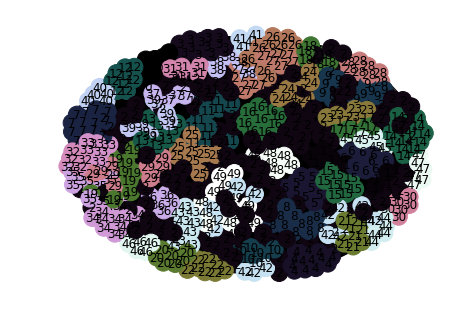

In [16]:
labels_dict = {i: str(labels[i])
               for i in range(n_extr)}
cmap = plt.get_cmap('cubehelix', K_spec)
nx.draw(G, pos=pos, node_color=labels/K_spec, cmap=cmap, labels=labels_dict)

In [ ]:
S_min = 0.2
S_thresh = S*(S > S_min)
G_edges = []
weights_edges = []
for edge in G.edges():
    if S_thresh[edge] > S_min:
        G_edges.append(edge)
        weights_edges.append(S_thresh[edge])
G_thresh = nx.from_numpy_matrix(S_thresh)
pos_thresh = nx.spring_layout(G_thresh, k=0.1)
nx.draw(G_thresh, pos=pos_thresh, node_color=labels/K_spec, cmap=cmap, labels=labels_dict, edgelist=G_edges)